# Create correlation plots

1. Import libraries
2. Define paths, oscillation and lat lon for plotting
3. Import indexes
4. Define function that maps correls
5. Import and prepare correlation matrices
6. Organise plot structure with GridSpec and plot correlations



### 1. Import libraries

In [1]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\Mariliasr\Anaconda3\Library\share'

import numpy as np
import pandas as pd
import scipy.io as sio
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import cmocean
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.gridspec as gridspec

### 2. Define paths, oscillation and lat lon for plotting

In [20]:
%cd ~

filepath = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Artigo\eofs'
out_path = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Artigo\figs'

%cd $filepath

era_seasonal = sio.loadmat('era_seasonal.mat')
lat = era_seasonal['era_lat']
lon = era_seasonal['era_lon']
oscillation = 'sam'

C:\Users\Mariliasr
C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Artigo\eofs
C:\Users\Mariliasr
C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Artigo\eofs


### 3. Import indexes

In [21]:
oni_seasonal = sio.loadmat('oni_seasonal')
oni_spring = np.concatenate(oni_seasonal['oni_spring'])
oni_summer = np.concatenate(oni_seasonal['oni_summer'][:117])
oni_autumn = np.concatenate(oni_seasonal['oni_autumn'][:117])
oni_winter = np.concatenate(oni_seasonal['oni_winter'][:117])

oni_swh = np.stack((oni_summer,
                    oni_autumn,
                    oni_winter,
                    oni_spring
                  ))

oni_mwd = np.stack((oni_summer,
                    oni_spring,
                    oni_summer,
                    oni_spring
                  ))

sam_seasonal = sio.loadmat('sam_seasonal')
sam_spring = np.concatenate(sam_seasonal['sam_spring'])
sam_summer = np.concatenate(sam_seasonal['sam_summer'][:117])
sam_autumn = np.concatenate(sam_seasonal['sam_autumn'][:117])
sam_winter = np.concatenate(sam_seasonal['sam_winter'][:117])

sam_swh = np.stack((sam_summer,
                    sam_autumn,
                    sam_winter,
                    sam_spring
                   ))

sam_mwd = np.stack((sam_summer,
                    sam_spring,
                    sam_summer,
                    sam_autumn
                  ))


### 4. Define function that maps correls

In [22]:
def mapcorrels(eof, lon, lat, ax, coastlines=False, grid=False):
    '''
    
    What: plots R and p matrices 
    to a cylindrical projection.
    
    R: R matrix (lon, lat), 
    p: p matrix (lon, lat),
    ax: axis to be plotted,
    lon, lat: lon and lat vectors,
    coastlines: draws coastlines,
    grid: draws meridians and parallels
    
    '''
    
    kw = {'levels':[0.05], 'colors':['k'], 'linewidths':[0.5]}
    map = Basemap(projection='cyl', llcrnrlon=lon.min(), 
                  llcrnrlat=lat.min(), urcrnrlon=lon.max(), 
                  urcrnrlat=lat.max(), resolution='c', ax=ax)
    map.fillcontinents(color=(0.55, 0.55, 0.55))
    
    if coastlines is True:
        map.drawcoastlines(color=(0.3, 0.3, 0.3))
    if grid is True:
        map.drawparallels((-30, 0),labels=[1,0,0,0], rotation=90, 
                           dashes=[1, 2], color=(0.3, 0.3, 0.3))
        map.drawmeridians((-50, -20, 10),labels=[0,0,0,1], 
                           dashes=[1, 2], color=(0.3, 0.3, 0.3))

    llons, llats = np.meshgrid(lon, lat)
    x, y = map(llons, llats)

    eof_graph = map.contourf(llons, llats, eof, 256, latlon=True, 
                             cmap=cmocean.cm.balance)
    
    return eof_graph

### 5. Import and prepare correlation matrices

In [23]:
def interpolate_array(np_array):
    '''
    What: interpolates np array using linear method
    np_array: 1d or 2d numpy array
    '''
    interpolated = pd.DataFrame(np_array).transpose().interpolate(method='linear', limit=300, limit_area=None)
    interpolated = pd.DataFrame(interpolated).transpose().interpolate(method='linear', limit=300, limit_area=None)
    interpolated = interpolated.values
    
    return interpolated
    

In [24]:
# Prepare mwd variables

mwd_eofs = np.load('mwd_eof_'+ oscillation + '.npy')


mwd_pcs = np.load('mwd_pcs_'+ oscillation + '.npy')


mwd_sum_R = interpolate_array(mwd_eofs[0, :, :])
mwd_aut_R = interpolate_array(mwd_eofs[1, :, :])
mwd_spr_R = interpolate_array(mwd_eofs[2, :, :])
mwd_win_R = interpolate_array(mwd_eofs[3, :, :])

mwd_aut_R = mwd_aut_R*-1
mwd_win_R = mwd_win_R*-1
mwd_spr_R = mwd_spr_R

mwd_sum_R[20, 0] = -0.5
mwd_aut_R[20, 0] = -0.5
mwd_win_R[20, 0] = -0.5
mwd_spr_R[20, 0] = -0.5

mwd_sum_R[20, 1] = 0.5
mwd_aut_R[20, 1] = 0.5
mwd_win_R[20, 1] = 0.5
mwd_spr_R[20, 1] = 0.5


mwd_R = np.dstack((mwd_sum_R,
                   mwd_aut_R,
                   mwd_win_R,
                   mwd_spr_R
                  ))

mwd_pcs[:, 1] = mwd_pcs[:, 1] * -1
mwd_pcs[:, 2] = mwd_pcs[:, 1] * -1


In [25]:
# Prepare swh variables

swh_eofs = np.load('swh_eof_'+ oscillation + '.npy')


swh_pcs = np.load('swh_pcs_'+ oscillation + '.npy')


swh_sum_R = interpolate_array(swh_eofs[0, :, :])
swh_aut_R = interpolate_array(swh_eofs[1, :, :])
swh_spr_R = interpolate_array(swh_eofs[2, :, :])
swh_win_R = interpolate_array(swh_eofs[3, :, :])

swh_sum_R = swh_sum_R*-1
swh_aut_R = swh_aut_R*-1
swh_win_R = swh_win_R*-1
swh_spr_R = swh_spr_R

swh_sum_R[20, 0] = -0.5
swh_aut_R[20, 0] = -0.5
swh_win_R[20, 0] = -0.5
swh_spr_R[20, 0] = -0.5

swh_sum_R[20, 1] = 0.5
swh_aut_R[20, 1] = 0.5
swh_win_R[20, 1] = 0.5
swh_spr_R[20, 1] = 0.5


swh_R = np.dstack((swh_sum_R,
                   swh_aut_R,
                   swh_win_R,
                   swh_spr_R
                  ))

swh_pcs[:, 0] = swh_pcs[:, 0] * -1
swh_pcs[:, 1] = swh_pcs[:, 1] * -1
swh_pcs[:, 2] = swh_pcs[:, 1] * -1


### 6. Organise plot structure with GridSpec and plot correlations

C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Artigo\figs
C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Artigo\figs


C:\Users\Mariliasr\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\Mariliasr\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


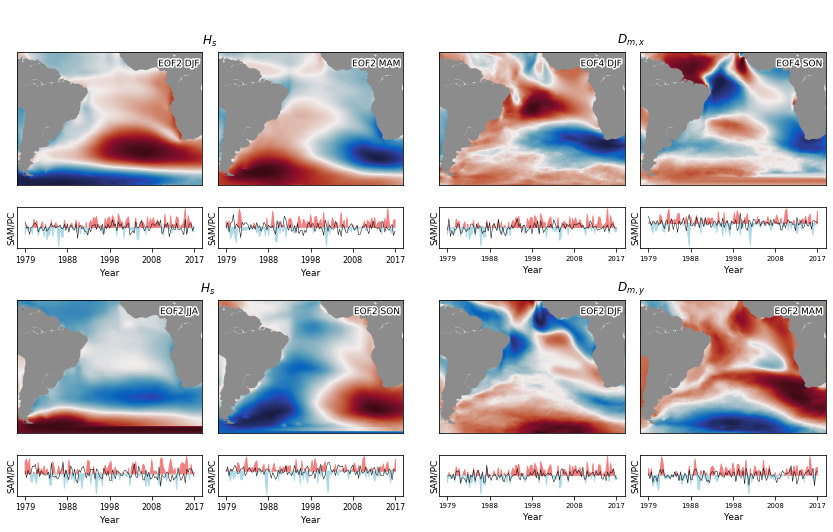

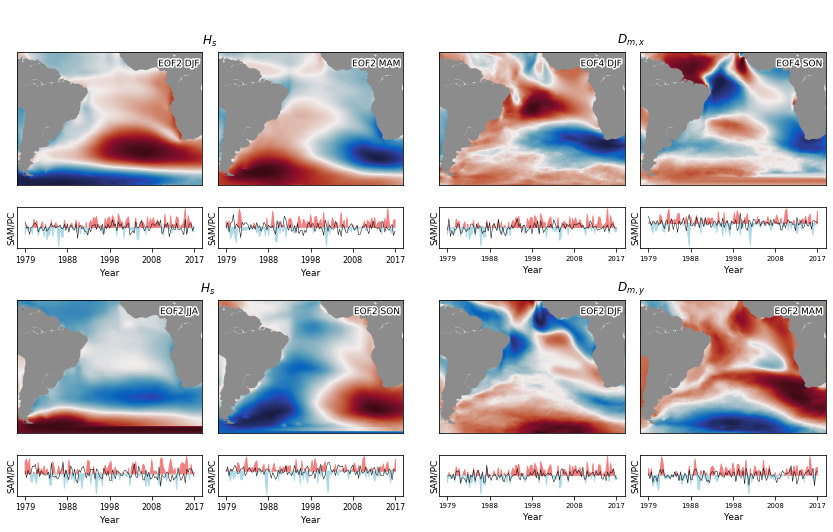

In [26]:
%cd $out_path

# Create plot structure and axes

fig = plt.figure(figsize=(14.5, 9))


gs = gridspec.GridSpec(nrows=6,
                       ncols=9, 
                       height_ratios=[1/7, 1, 1/4,
                                      1/7, 1, 1/4],
                       width_ratios=[1, 1, 1,
                                     1, 1/17,
                                     1, 1, 1, 1],
                       wspace=1/5,
                       hspace=1/12)

hst1 = plt.subplot(gs[0, 0:4])
hs1 = plt.subplot(gs[1, 0:2])
hs2 = plt.subplot(gs[1, 2:4])
hspc1 = plt.subplot(gs[2, 0:2])
hspc2 = plt.subplot(gs[2, 2:4])

hst2 = plt.subplot(gs[3, 0:4])
hs3 = plt.subplot(gs[4, 0:2])
hs4 = plt.subplot(gs[4, 2:4])
hspc3 = plt.subplot(gs[5, 0:2])
hspc4 = plt.subplot(gs[5, 2:4])

dmt1 = plt.subplot(gs[0, 5:9])
dm1 = plt.subplot(gs[1, 5:7])
dm2 = plt.subplot(gs[1, 7:9])
dmpc1 = plt.subplot(gs[2, 5:7])
dmpc2 = plt.subplot(gs[2, 7:9])

dmt2 = plt.subplot(gs[3, 5:9])
dm3 = plt.subplot(gs[4, 5:7])
dm4 = plt.subplot(gs[4, 7:9])
dmpc3 = plt.subplot(gs[5, 5:7])
dmpc4 = plt.subplot(gs[5, 7:9])


# Lists of axes to be used in loops
hs_ax = [hs1, hs2,
         hs3, hs4]
hspc_ax = [hspc1, hspc2,
           hspc3, hspc4]
dm_ax = [dm1, dm2,
         dm3, dm4]
dmpc_ax = [dmpc1, dmpc2,
           dmpc3, dmpc4]

# Titles and texts
hst1.text(0.478, -0.8, '$H_{s}$',
         va='bottom', size=12)
hst1.axis('off')

hst2.text(0.475, -0.8, '$H_{s}$',
         va='bottom', size=12)
hst2.axis('off')

dmt1.text(0.46, -0.8, '$D_{m,x}$',
          va='bottom', size=12)
dmt1.axis('off')

dmt2.text(0.46, -0.8, '$D_{m,y}$',
          va='bottom', size=12)
dmt2.axis('off')


import matplotlib.patheffects as path_effects
style = dict(fontstretch='extra-expanded',
             fontweight='medium',
             path_effects=[path_effects.Stroke(linewidth=3,
                                               foreground='white'),
                           path_effects.Normal()])


hs1.text(5, 7, 'EOF2 DJF',
         size=9, **style)
hs2.text(1, 7, 'EOF2 MAM',
         size=9, **style)
hs3.text(6, 7, 'EOF2 JJA',
         size=9, **style)
hs4.text(2, 7, 'EOF2 SON',
         size=9, **style)

dm1.text(5, 7, 'EOF4 DJF',
         size=9, **style)
dm2.text(2, 7, 'EOF4 SON',
         size=9, **style)

dm3.text(5, 7, 'EOF2 DJF',
         size=9, **style)
dm4.text(1, 7, 'EOF2 MAM',
         size=9, **style)


for e in range(len(hs_ax)):
    R_graph = mapcorrels(swh_R[:, :, e], 
                         lon, lat, hs_ax[e])
    mapcorrels(mwd_R[:, :, e], 
               lon, lat, dm_ax[e])

locs = list(range(0, 117, 117//4))
years = list(range(1979, 2018, 1))
years = [e for e in years for i in range(3)]
labels = []

for loc in locs:
    label = years[loc]
    labels.append(label)

x = list(range(0, 117))

for i, ax in enumerate(hspc_ax):
    ax.fill_between(x, 0, sam_swh[i], where=sam_swh[i]>0, 
                    interpolate=True, color='lightcoral')
    ax.fill_between(x, 0, sam_swh[i], where=sam_swh[i]<0, 
                    interpolate=True, color='lightblue')
    A = ax.plot(x, swh_pcs[i], color='k', linewidth=0.5)
    #ax.legend(A, ['PC'], loc='lower right',
    #          fontsize=7)
    ax.set_xlabel('Year', fontsize=9)
    ax.set_ylabel('SAM/PC', fontsize=9,
                  labelpad=0.5,
                  fontstretch='extra-expanded')
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticks(locs)
    ax.set_xticklabels(labels, fontsize=8)
    ax.tick_params(axis='y', pad=0.5,
                   labelsize=7,
                   labelrotation=90)
for i, ax in enumerate(dmpc_ax):
    ax.fill_between(x, 0, sam_mwd[i], where=sam_mwd[i]>0, 
                    interpolate=True, color='lightcoral')
    ax.fill_between(x, 0, sam_mwd[i], where=sam_mwd[i]<0, 
                    interpolate=True, color='lightblue')
    A = ax.plot(x, mwd_pcs[i], color='k', linewidth=0.5)
    #ax.legend(A, ['PC'], loc='lower right',
    #          fontsize=7)
    ax.set_xlabel('Year', fontsize=9)
    ax.set_ylabel('SAM/PC', fontsize=9,
                  labelpad=0.5,
                  fontstretch='extra-expanded')
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticks(locs)
    ax.set_xticklabels(labels, fontsize=7)
    ax.tick_params(axis='y', pad=0.5,
                   labelsize=8,
                   labelrotation=90)
                            

   
plt.savefig(oscillation + '_eof.png')


plt.show()


In [ ]:
oni_swh[0].shape

In [ ]:
len(x)